In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/Users/fbahena/Desktop/paco_growth/nlp_course/spam_classifier'

In [2]:
df = pd.read_csv("spam.tsv",sep="\t")

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df.label.value_counts() / df.shape[0]

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

Very imbalanced dataset


In [9]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
ham = df.loc[df["label"] == "ham"]
spam = df.loc[df["label"] == "spam"]

In [5]:
sampled_ham = ham.sample(spam.shape[0])

In [6]:
data = pd.concat([sampled_ham,spam], ignore_index=True)

In [7]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [8]:
ham_length = data.loc[data["label"] == "ham"].loc[:,["length"]]
spam_length = data.loc[data["label"] == "spam"].loc[:,"length"]

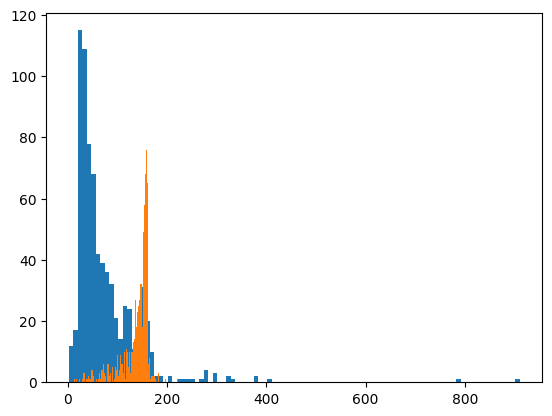

In [9]:
plt.hist(ham_length, bins=100)
plt.hist(spam_length, bins=100)
plt.show()

There is a higher probabiblity that messages that are longer are actually spam. 

In [17]:
data.dtypes

label      object
message    object
length      int64
punct       int64
dtype: object

In [10]:
ham_punct = data.loc[data["label"] == "ham"].loc[:,["punct"]]
spam_punct = data.loc[data["label"] == "spam"].loc[:,"punct"]

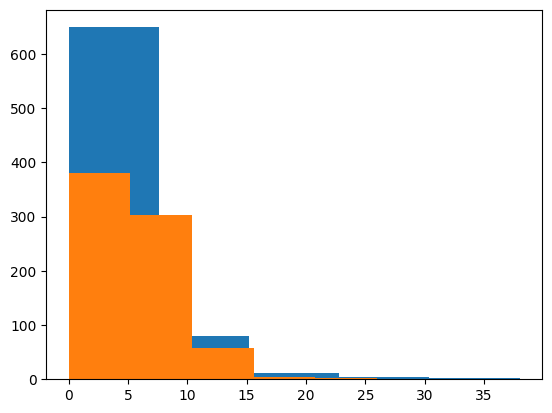

In [11]:
plt.hist(ham_punct, bins=5)
plt.hist(spam_punct, bins=5)
plt.show()

In [20]:
data.to_csv("processed_dataset.csv",index=False,header=True)

Punctuation is not a differentiator between spam messages.

## Split data

In [21]:
from sklearn.model_selection import train_test_split

In [13]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [22]:
import sklearn
sklearn.__version__

'1.3.2'

In [25]:
X_train, X_test, y_train, y_test =\
train_test_split(data["message"],data["label"], test_size= 0.3, random_state= 0)

In [26]:
X_train[:1]

1438    You have 1 new message. Please call 08715205273
Name: message, dtype: object

## Apply Model

In [5]:
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics \
import classification_report, recall_score, accuracy_score,precision_score,confusion_matrix

Lets take a look at the tfid vetorizer transform

In [3]:
data = pd.read_csv("processed_dataset.csv")

NameError: name 'pd' is not defined

In [260]:
data.head()

,label,message,length,punct
0,ham,Ugh just got outta class,24,0
1,ham,You have to pls make a note of all she.s expos...,166,5
2,ham,Hey whats up? U sleeping all morning?,37,2
3,ham,Ok lor...,9,3
4,ham,You are not bothering me but you have to trust...,63,2


In [261]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test =\
train_test_split(data["message"],data["label"], test_size= 0.3, random_state= 0)

In [263]:
## 
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
## learn vocabulary and get documents tfidf matrix, Row is document, 
## colum is the tfidf value for that document

X_train_tf_idf is a sparse matrix

In [264]:
X_train_tfidf.toarray()[0:2,0:2]

array([[0., 0.],
       [0., 0.]])

In [231]:
vectorizer.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zogtorius', 'zouk', 'ú1'],
      dtype=object)

In [232]:
## doc names
X_train.index

Index([1438,  431,  194,  240, 1309,  742, 1430, 1064,  981,   49,
       ...
       1094,  599,  277, 1033, 1383,  763,  835, 1216,  559,  684],
      dtype='int64', length=1045)

In [233]:
df = pd.DataFrame(X.toarray(),index=X_train.index, columns=vectorizer.get_feature_names_out())
df.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02073162414,...,yoyyooo,yr,yrs,yup,zaher,zealand,zed,zogtorius,zouk,ú1
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
df.loc["doc_frequency"] = (df > 0).sum()
df.loc["doc_frequency"].sort_values(ascending=False)

to       475.0
you      320.0
call     266.0
the      218.0
your     211.0
         ...  
fund       1.0
funk       1.0
funky      1.0
funny      1.0
ú1         1.0
Name: doc_frequency, Length: 3675, dtype: float64

fit the model on the tfidf matrix from x_train and y train

In [235]:

mod = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf,y_train)

Lets check the model on the train data. 

In [236]:
y_pred = mod.predict(X_train_tfidf)

accuracy_score(y_train,y_pred)

1.0

uuuuuuuu, so 100 precision on already seen data. 

In [237]:
X_test_tfidf = vectorizer.transform(X_test)
y_pred = mod.predict(X_test_tfidf)

In [170]:
accuracy_score(y_test,y_pred)

0.9487750556792873

Thats more like it.

Note that for evaluating data on the vectorizer preprocessing we no longer call fit_transform, but rather transform, the preprocessor has already been fit for the training data, for test data we only want to transform. 

Also note, we can also use a pipeline object to concatenate classifier fitting and transformations and preprocessing. 

### Creating the actual pipeline 

In [239]:
classifierRF = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("classifier",RandomForestClassifier(n_estimators=100,random_state=0))
    ]
)



In [192]:
classifierRF.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=0))])

In [193]:
y_pred = classifierRF.predict(X_test)

In [194]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [195]:
precision_score(y_test,y_pred, pos_label="spam")

0.9950248756218906

In [196]:
recall_score(y_test,y_pred, pos_label="spam")

0.9009009009009009

In [197]:
report = classification_report(y_test, y_pred, output_dict=True)
report["spam"]

{'precision': 0.9950248756218906,
 'recall': 0.9009009009009009,
 'f1-score': 0.9456264775413711,
 'support': 222.0}

## Support vector machine 

In [199]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [265]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [211]:
mod = svm.SVC(random_state=0).fit(X_train_tfidf,y_train)

In [272]:
y_pred = mod.predict(X_test_tfidf)

In [274]:
len(y_pred)

449

LEts be tidy and use a Pipeline Object

In [266]:
classifierSVC = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("svc",svm.SVC(random_state=0))
    ]
)


(1045,)

In [269]:
svc_mod = classifierSVC.fit(X_train,y_train)

In [270]:
y_pred = svc_mod.predict(X_test)

In [271]:
report = classification_report(y_test, y_pred, output_dict=True)
pprint(report["spam"])
pprint(report["ham"])

{'f1-score': 0.9745958429561201,
 'precision': 1.0,
 'recall': 0.9504504504504504,
 'support': 222.0}
{'f1-score': 0.9763440860215054,
 'precision': 0.9537815126050421,
 'recall': 1.0,
 'support': 227.0}


### Let us be tidy 

In [6]:
classifierRF = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("classifier",RandomForestClassifier(n_estimators=100,random_state=0))
    ]
)

classifierSVC = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("svc",svm.SVC(random_state=0))
    ]
)

svc_mod = classifierSVC.fit(X_train,y_train)
y_pred = svc_mod.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

NameError: name 'X_train' is not defined